In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import TypeAlias
from decimal import Decimal
%matplotlib inline

Number: TypeAlias = int | float

def number(cin: str) -> Number | None:
    """
    La función number retorna un dato de tipo Number,
    recibe una cadena como parámetro y la función en base a lo recibido,
    retorna un flotante, un entero o en su defecto, retorna None
    """

    result: Number
    if '.' in cin:
        try:
            result = float(cin)
        except ValueError:
            return None

        return result

    try:
        result = int(cin)
    except ValueError:
        return None
    
    return result

def valid(msg: str, value_min: Number | None = None, value_max: Number | None = None, positive: bool = True) -> Number | None:
    """"
    Valida que la entrada de un número esté correcta teniendo en cuenta criterios
    como que tenga que ser un número positivo, el mínimo valor que pueda tomar o
    el máximo valor

    - param msg: str. Es el mensaje que imprime el programa para pedir la entrada
    - param value_min: Number. Es el mínimo valor que puede tomar la entrada (sin incluirlo),
    además, cuando se le es dado el valor None (viene por defecto), no lo toma en cuenta
    - param value_max: Number. Funciona de manera analoga a value_min, con la diferencia
    que se refiere al valor máximo que puede tomar el programa
    - param positive: bool. Quiere decirle al programa que la entrada del número que se desea
    tiene que ser mayor o igual a 0, por defecto está tomado como True

    La función retorna un dato de tipo Number después de haber válidado la entrada
    previamente. En caso de que los parámetros value_min y value_max no estén
    bien planteado (value_min > value_max), la función retorna None
    """

    result: Number | None = None

    if value_min is None and value_max is None:
        while result is None or (result < 0 and positive):
            result = number(input(msg))

            if result is None:
                print('El valor tiene que ser númerico')
                continue

            if result < 0 and positive:
                print('El valor tiene que ser mayor que 0')
        
        return result

    if value_min is None and value_max is not None:
        while result is None or (result < 0 and positive) or result >= value_max:
            result = number(input(msg))

            if result is None:
                print('El valor tiene que ser númerico')
                continue

            if result < 0 and positive:
                print('El valor tiene que ser mayor que 0')
            if result >= value_max:
                print(f'El valor tiene que ser menor que {value_max}')
        
        return result

    if value_max is None and value_min is not None:
        while result is None or (result < 0 and positive) or result <= value_min:
            result = number(input(msg))

            if result is None:
                print('El valor tiene que ser númerico')
                continue

            if result < 0 and positive:
                print('El valor tiene que ser mayor que 0')
            if result <= value_min:
                print(f'El valor tiene que ser mayor que {value_min}')

        return result
    
    if value_min > value_max:
        return result # Retorna None
    
    if value_min == value_max:
        return value_min

    while result is None or (result < 0 and positive) or result <= value_min or result >= value_max:
        result = number(input(msg))

        if result is None:
            print('El valor tiene que ser númerico')
            continue

        if result < 0 and positive:
            print('El valor tiene que ser mayor que 0')
        else:
            if result <= value_min:
                print(f'El valor tiene que ser mayor que {value_min}')
            if result >= value_max:
                print(f'El valor tiene que ser menor que {value_max}')

    return result


In [211]:
k: Number = valid('Elasticity constant [N/m]: ', value_min=0)
m: Number = valid('Body mass [Kg]: ', value_min=0)
b: Number = valid('Damping constant [Kg/s]: ')

x0: Number = valid('Initial position [m]: ', positive=False)
v0: Number = valid('Initial velocity [m/s]: ', positive=False)

ti: Number = valid('Initial time [s]: ')
tf: Number = valid('Final time [s]: ', value_min=ti)
delta: Number = tf - ti

print('\nUser input:')
print(f'Elasticity constant: {k = } N/m')
print(f'Damping constant: {b = } Kg/s')
print(f'Body mass: {m = } Kg')
print(f'Initial position: {x0 = } m')
print(f'Initial velocity: {v0 = } m/s')
print(f'Initial time: {ti = } s')
print(f'Final time: {tf = } s')

El valor tiene que ser númerico

User input:
Elasticity constant: k = 18 N/m
Damping constant: b = 0.3 Kg/s
Body mass: m = 0.3 Kg
Initial position: x0 = -5 m
Initial velocity: v0 = 1 m/s
Initial time: ti = 0 s
Final time: tf = 10 s


In [212]:
# 1ra parte salida programa
w0: Number = np.sqrt(k / m)
factor_a: Number = b / (2*m)
mechanical_energy: Number = (k * x0**2)/2 + (m * v0**2)/2

print(f'Natural angular frequency: {w0} rad/s')
print(f'Damping parameter: {factor_a} s^-1')
print(f'Total mechanical energy given: {mechanical_energy} J')

temp_a: Decimal = Decimal(factor_a)
temp_w: Decimal = Decimal(w0)

over: bool = factor_a**2 > temp_w**2
critical: bool = factor_a**2 == temp_w**2
under: bool = factor_a**2 < temp_w**2

if over or critical:
    lambda1: float = -factor_a + np.sqrt(factor_a**2 - w0**2)
    lambda2: float = -factor_a - np.sqrt(factor_a**2 - w0**2)
    
    print('\nThe equation roots are:')
    print(f'Root 1: {lambda1}')
    print(f'Root 2: {lambda2}')


Natural angular frequency: 7.745966692414834 rad/s
Damping parameter: 0.5 s^-1
Total mechanical energy given: 225.15 J


In [214]:
# 2da parte salida programa

print('The system is\n=> ', end='')
if over:
    print('Overdamped')
    c2: float = (v0 - x0*lambda1) / (lambda2-lambda1)
    c1: float = x0 - c2

elif critical:
    print('Critically damped')
    c2: float = v0 + factor_a*x0
    c1: float = x0
    
else:
    print('Underdamped')
    angular_freq: float = np.sqrt(k/m - (factor_a)**2)
    c2: float = -np.pi/2 if x0 == 0 else np.arctan(-(v0/(x0*angular_freq) + factor_a/angular_freq))
    c1: float = np.sqrt((x0**2+(v0/angular_freq)**2) / (((factor_a/angular_freq)*np.cos(c2))**2 + (factor_a/angular_freq)*np.sin(2*c2) + 1))
    c1 *= -1 if(x0 < 0 and np.cos(c2) > 0) else 1

print('\nConstants value')
print(f'{c1 = }')
print(f'{c2 = }\n')

""" Para comprobar el cálculo de las constantes
if over:
    print(f'1. {c1 + c2 = }')
    print(f'2. {lambda1*c1 + lambda2*c2 = }')
elif critical:
    print(f'1. {c1 = }')
    print(f'2. {-c1 * factor_a + c2 = }')
else:
    print(f'Numerador: {(x0**2+(v0/angular_freq)**2)}')
    print(f'Denominador: {(((factor_a/angular_freq)*np.cos(c2))**2 + (factor_a/angular_freq)*np.sin(2*c2) + 1)}')
    print(f'1. {c1 * np.cos(c2) = }')
    print(f'2. {-c1*factor_a*np.cos(c2) - c1*angular_freq*np.sin(c2) = }')
"""

The system is
=> Underdamped

Constants value
c1 = -5.003764273401145
c2 = -0.03879130465265856

Numerador: 25.01673640167364
Denominador: 0.9991644385026738
1. c1 * np.cos(c2) = -4.999999999999999
2. -c1*factor_a*np.cos(c2) - c1*angular_freq*np.sin(c2) = 0.9999999999999996


In [222]:
# 3ra parte salida del programa
t: np.ndarray = np.linspace(ti, tf, 2_000)

df_data: pd.DataFrame = pd.DataFrame(
    {'time': t}
)

if under:
    df_data['position'] = c1*np.exp(-factor_a*t) * np.cos(angular_freq*t + c2)
    df_data['velocity'] = -c1*factor_a*np.exp(-factor_a*t)*np.cos(angular_freq*t + c2) - c1*angular_freq*np.exp(-factor_a*t)*np.sin(angular_freq*t + c2)
    df_data['acceleration'] = 2*c2*factor_a*angular_freq*np.exp(-factor_a*t) * np.sin(angular_freq*t + c2) + (factor_a**2 - angular_freq**2)*np.exp(-factor_a*t)*np.cos(angular_freq*t + c2)
elif critical:
    df_data['position'] = (c1 + c2*t) * np.exp(-factor_a * t)
    df_data['velocity'] = -factor_a*c1*np.exp(-factor_a*t) + c2*np.exp(-factor_a*t) - c2*factor_a*t*np.exp(-factor_a*t)
    df_data['acceleration'] = factor_a*np.exp(-factor_a*t) * (c1*factor_a - 2*c2 + c2*factor_a*t)
else:
    df_data['position'] = c1*np.exp(lambda1*t) + c2*np.exp(lambda2*t)
    df_data['velocity'] = lambda1*c1*np.exp(lambda1*t) + lambda2*c2*np.exp(lambda2*t)
    df_data['acceleration'] = lambda1**2 * c1*np.exp(lambda1*t) + lambda2**2 * c2*np.exp(lambda2*t)

df_data['kinetic'] = m*df_data['velocity']**2 / 2
df_data['potential'] = k*df_data['position']**2 / 2

df_data

,time,position,velocity,acceleration,kinetic,potential
0,0.000000,-5.000000,1.000000,-59.443610,0.150000,225.000000
1,0.005003,-4.991264,2.490890,-59.351324,0.930680,224.214465
2,0.010005,-4.975097,3.970610,-59.170617,2.364862,222.764335
3,0.015008,-4.951560,5.437001,-58.902199,4.434146,220.661560
4,0.020010,-4.920726,6.887931,-58.546910,7.116540,217.921885
...,...,...,...,...,...,...
1995,9.979990,0.004605,0.258512,0.052735,0.010024,0.000191
1996,9.984992,0.005891,0.255650,0.068047,0.009804,0.000312
1997,9.989995,0.007162,0.252420,0.083180,0.009557,0.000462
1998,9.994997,0.008416,0.248827,0.098113,0.009287,0.000637


<Axes: title={'center': '$x(t)$'}, xlabel='Time ($s$)', ylabel='Position ($m$)'>

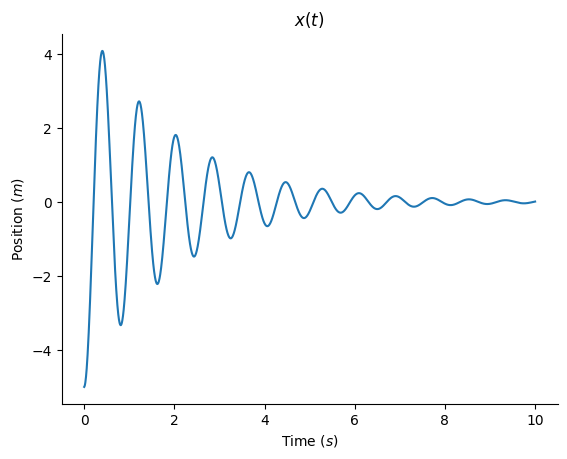

In [223]:
# Gráfica x(t)

plt.title('$x(t)$')
plt.xlabel('Time ($s$)')
plt.ylabel('Position ($m$)')

sns.despine()
sns.lineplot(
    data = df_data, x='time', y='position'
)

<Axes: title={'center': '$v_x(t)$'}, xlabel='Time ($s$)', ylabel='Velocity ($m/s$)'>

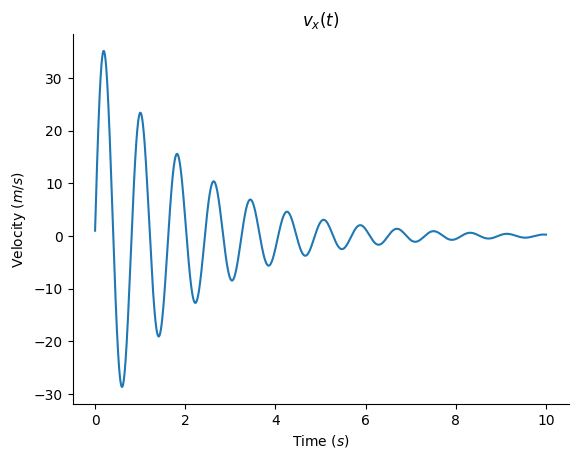

In [224]:
# Gráfica v(t)

plt.title('$v_x(t)$')
plt.xlabel('Time ($s$)')
plt.ylabel('Velocity ($m/s$)')

sns.despine()
sns.lineplot(
    data = df_data, x='time', y='velocity'
)

<Axes: title={'center': '$a(t)$'}, xlabel='Time ($s$)', ylabel='Acceleration ($m/s^2$)'>

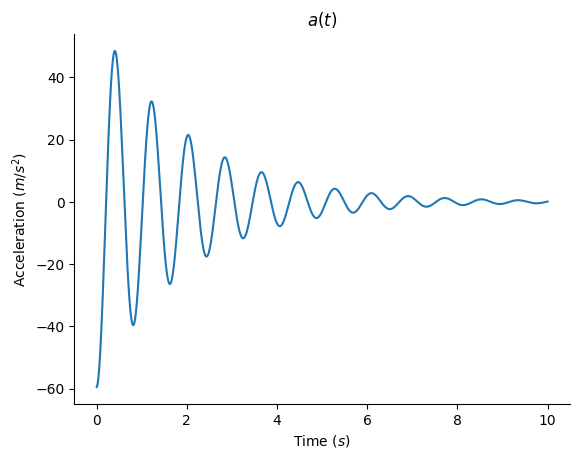

In [225]:
# Gráfica a(t)

plt.title('$a(t)$')
plt.xlabel('Time ($s$)')
plt.ylabel('Acceleration ($m/s^2$)')

sns.despine()
sns.lineplot(
    data = df_data, x='time', y='acceleration'
)

<Axes: title={'center': '$E_c (t)$'}, xlabel='Time ($s$)', ylabel='Energy ($J$)'>

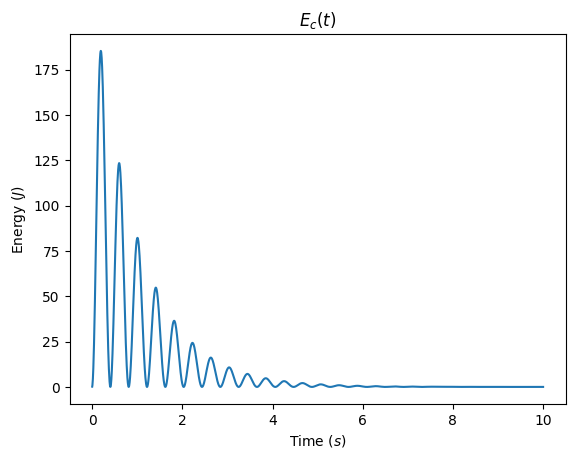

In [226]:
# E_c(t)

plt.title('$E_c (t)$')
plt.xlabel('Time ($s$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='time', y='kinetic'
)

<Axes: title={'center': 'U($t$)'}, xlabel='Time ($s$)', ylabel='Energy ($J$)'>

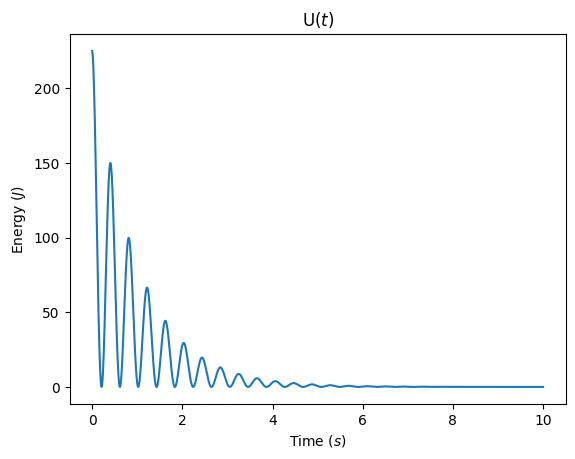

In [227]:
# U(t)

plt.title('U($t$)')
plt.xlabel('Time ($s$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='time', y='potential'
)

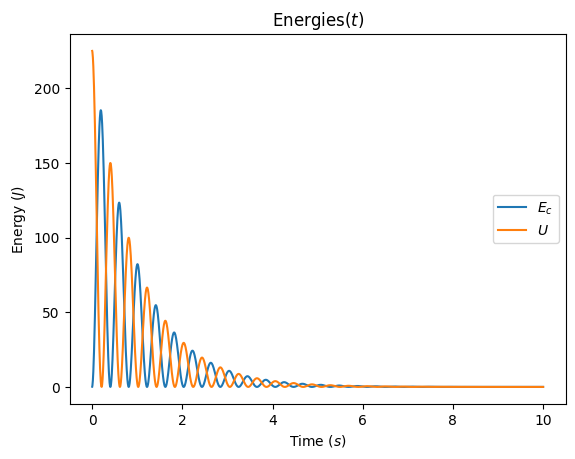

In [228]:
plt.title('Energies($t$)')
plt.xlabel('Time ($s$)')
plt.ylabel('Energy ($J$)')

sns.lineplot(
    data = df_data, x='time', y='kinetic',
    label = '$E_c$'
)

sns.lineplot(
    data = df_data, x='time', y='potential',
    label = '$U$'
)

plt.legend(loc=7)